In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('updated_dataset.csv')

In [3]:
df.head(102)

,ligandID,7RDX - rank,7RDX - mean,7RDY - rank,7RDY - mean,7RDZ - rank,7RDZ - mean,7RE0 - rank,7RE0 - mean,Variance of Affinity Scores,Variance of Rankings,Mean Ranking,Mean Affinity Score,Max Affinity ID,Min Affinity ID,Max Rank ID,Min Rank ID
0,Mrv0541-02231214492D,0.0,-16.513636,1,-15.847727,1.0,-15.550000,0.0,-14.900000,0.448765,0.333333,0.50,-15.702841,7RE0,7RDX,7RDY,7RDX
1,Mrv0541-02231215202D,1.0,-15.552273,4,-14.772727,6.0,-14.311364,3.0,-14.209091,0.374390,4.333333,3.50,-14.711364,7RE0,7RDX,7RDZ,7RDX
2,Mrv0541-02231215192D,2.0,-15.464000,3,-14.802273,NaN,NaN,NaN,NaN,0.218941,0.500000,2.50,-15.133136,7RDY,7RDX,7RDY,7RDX
3,Mrv1718007201812002D,3.0,-15.450000,15,-14.347727,26.0,-13.320455,5.0,-14.170455,0.766368,111.583333,12.25,-14.322159,7RDZ,7RDX,7RDZ,7RDX
4,Glycyrrhetinic-acid-ChEBI,4.0,-15.418182,9,-14.445455,18.0,-13.693182,9.0,-13.900000,0.594409,34.000000,10.00,-14.364205,7RDZ,7RDX,7RDZ,7RDX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Mrv1652310171623502D-1704021545870,NaN,NaN,75,-12.919444,NaN,NaN,NaN,NaN,NaN,NaN,75.00,-12.919444,7RDY,7RDY,7RDY,7RDY
97,Mrv1718008191817332D,NaN,NaN,77,-12.886364,NaN,NaN,43.0,-12.754545,0.008688,578.000000,60.00,-12.820455,7RE0,7RDY,7RDY,7RE0
98,Mrv1572004221603192D-1704021548029,NaN,NaN,78,-12.879545,NaN,NaN,NaN,NaN,NaN,NaN,78.00,-12.879545,7RDY,7RDY,7RDY,7RDY
99,Mrv0541-05031422022D,NaN,NaN,99,-12.668182,NaN,NaN,NaN,NaN,NaN,NaN,99.00,-12.668182,7RDY,7RDY,7RDY,7RDY


In [4]:
df.count()

ligandID                       101
7RDX - rank                     71
7RDX - mean                     71
7RDY - rank                    101
7RDY - mean                    101
7RDZ - rank                     68
7RDZ - mean                     68
7RE0 - rank                     76
7RE0 - mean                     76
Variance of Affinity Scores     78
Variance of Rankings            78
Mean Ranking                   101
Mean Affinity Score            101
Max Affinity ID                101
Min Affinity ID                101
Max Rank ID                    101
Min Rank ID                    101
dtype: int64

In [5]:
df.notna().all(axis=1).sum()

67

In [6]:
len(df)

101

In [7]:
def plot_affinity(df):
    # Extracting the unique identifiers for the conformations (e.g., '7RDX', '7RDY', '7RDZ', '7RE0')
    conformation_identifiers = [col.split(' - ')[0] for col in df.columns if 'mean' in col]

    # Create a list of mean columns
    mean_columns = [identifier + ' - mean' for identifier in conformation_identifiers]

    # Creating the plot
    plt.figure(figsize=(12, 7))

    # Plotting the lines for each molecule
    for index, row in df.iterrows():
        # Ensure affinity_scores are floats and handle NaN values
        affinity_scores = row[mean_columns].astype(float).values
        # Check if all the scores are NaN
        if not np.all(np.isnan(affinity_scores)):
            # Use only rows with no NaN values for plotting
            valid_scores = ~np.isnan(affinity_scores)
            plt.plot(np.array(conformation_identifiers)[valid_scores], affinity_scores[valid_scores], marker='o')

    # Adding labels and title
    plt.xlabel('Conformation Name', fontsize=14)
    plt.ylabel('Affinity Score', fontsize=14)
    plt.title('Affinity Scores Across Conformations', fontsize=16)

    # Adding grid for better readability
    plt.grid(True, which="both", ls="--", linewidth=0.5)

    # Show the plot
    plt.show()

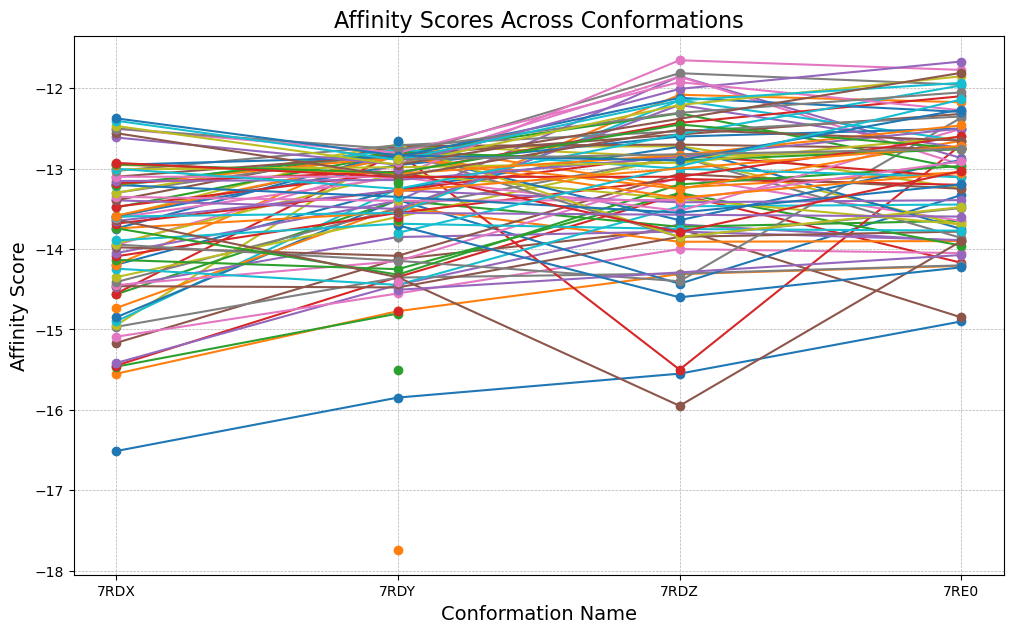

In [8]:
plot_affinity(df)

In [40]:
def plot_rank(df):
    # Extracting the unique identifiers for the conformations (e.g., '7RDX', '7RDY', '7RDZ', '7RE0')
    conformation_identifiers = [col.split(' - ')[0] for col in df.columns if 'rank' in col]

    # Create a list of mean columns
    rank_columns = [identifier + ' - rank' for identifier in conformation_identifiers]

    # Creating the plot
    plt.figure(figsize=(12, 7))

    # Plotting the lines for each molecule
    for index, row in df.iterrows():
        # Ensure affinity_scores are floats and handle NaN values
        rank_scores = row[rank_columns].astype(float).values
        # Check if all the scores are NaN
        if not np.all(np.isnan(rank_scores)):
            # Use only rows with no NaN values for plotting
            valid_scores = ~np.isnan(rank_scores)
            plt.plot(np.array(conformation_identifiers)[valid_scores], rank_scores[valid_scores], marker='o')

    # Adding labels and title
    plt.xlabel('Conformation Name', fontsize=14)
    plt.ylabel('Ranks Score', fontsize=14)
    plt.title('Rank Scores Across Conformations', fontsize=16)

    # Adding grid for better readability
    plt.grid(True, which="both", ls="--", linewidth=0.5)

    # Show the plot
    plt.show()

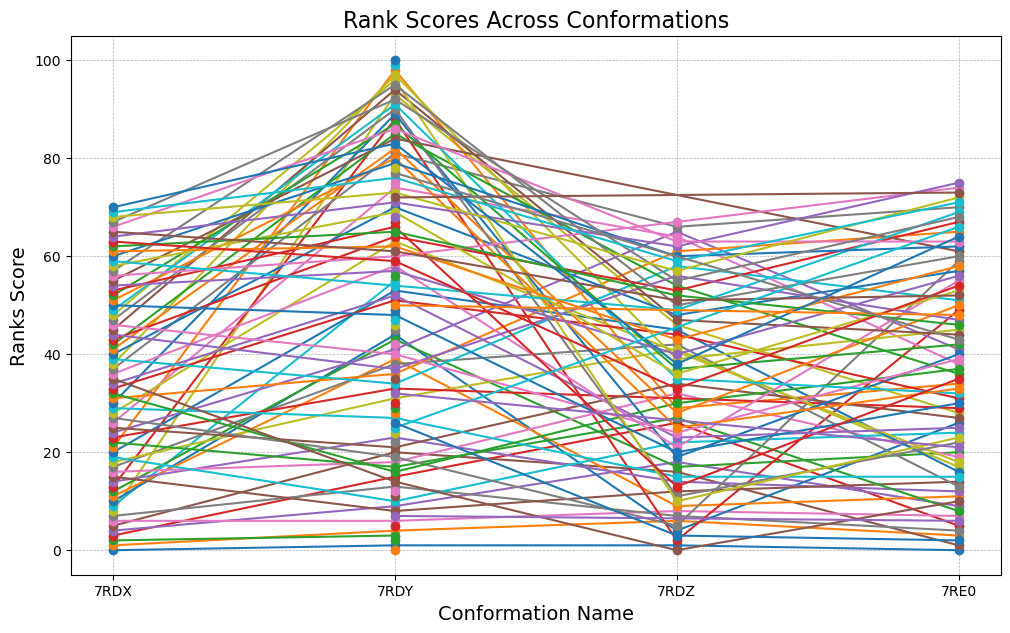

In [41]:
plot_rank(df)

In [15]:
df_dropna=df.dropna().copy()

In [16]:
len(df_dropna)

67

In [142]:
df_dropna.head(67)

,ligandID,7RDX - rank,7RDX - mean,7RDY - rank,7RDY - mean,7RDZ - rank,7RDZ - mean,7RE0 - rank,7RE0 - mean,Variance of Affinity Scores,...,Min Affinity ID,Max Rank ID,Min Rank ID,New7RDX_rank,New7RDY_rank,New7RDZ_rank,New7RE0_rank,max_rank,min_rank,new_rank_var
0,Mrv0541-02231214492D,0.0,-16.513636,1,-15.847727,1.0,-15.550000,0.0,-14.900000,0.448765,...,7RDX,7RDY,7RDX,1.0,1.0,2.0,1.0,7RDZ,7RDX,0.1875
1,Mrv0541-02231215202D,1.0,-15.552273,4,-14.772727,6.0,-14.311364,3.0,-14.209091,0.374390,...,7RDX,7RDZ,7RDX,2.0,2.0,6.0,3.0,7RDZ,7RDX,2.6875
3,Mrv1718007201812002D,3.0,-15.450000,15,-14.347727,26.0,-13.320455,5.0,-14.170455,0.766368,...,7RDX,7RDZ,7RDX,3.0,9.0,26.0,5.0,7RDZ,7RDX,82.1875
4,Glycyrrhetinic-acid-ChEBI,4.0,-15.418182,9,-14.445455,18.0,-13.693182,9.0,-13.900000,0.594409,...,7RDX,7RDZ,7RDX,4.0,5.0,18.0,8.0,7RDZ,7RDX,30.6875
5,Mrv1718005171816422D,5.0,-15.168182,20,-14.125000,16.0,-13.747727,1.0,-14.850000,0.424177,...,7RDX,7RDY,7RE0,5.0,14.0,16.0,2.0,7RDZ,7RE0,34.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Mrv1572001261621122D,66.0,-12.502273,86,-12.802273,63.0,-11.922727,63.0,-12.272727,0.137924,...,7RDY,7RDY,7RDZ,63.0,55.0,63.0,57.0,7RDX,7RDY,12.7500
67,Mrv1909-12181921482D,67.0,-12.500000,92,-12.759091,55.0,-12.304545,68.0,-12.050000,0.090170,...,7RDY,7RDY,7RDZ,64.0,61.0,55.0,61.0,7RDX,7RDZ,10.6875
68,Mrv1652306231722482D,68.0,-12.468182,73,-12.950000,57.0,-12.206818,72.0,-11.850000,0.214354,...,7RDY,7RDY,7RDZ,65.0,46.0,57.0,65.0,7RDX,7RDY,60.6875
69,Mrv1652310211602442D-1704021547279,69.0,-12.402273,76,-12.890909,59.0,-12.150000,71.0,-11.931818,0.170012,...,7RDY,7RDY,7RDZ,66.0,48.0,59.0,64.0,7RDX,7RDY,48.6875


In [20]:
df_dropna['New7RDX_rank'] = df_dropna['7RDX - mean'].rank(method='first')
df_dropna['New7RDY_rank'] = df_dropna['7RDY - mean'].rank(method='first')
df_dropna['New7RDZ_rank'] = df_dropna['7RDZ - mean'].rank(method='first')
df_dropna['New7RE0_rank'] = df_dropna['7RE0 - mean'].rank(method='first')

In [21]:
df_dropna

,ligandID,7RDX - rank,7RDX - mean,7RDY - rank,7RDY - mean,7RDZ - rank,7RDZ - mean,7RE0 - rank,7RE0 - mean,Variance of Affinity Scores,...,Mean Ranking,Mean Affinity Score,Max Affinity ID,Min Affinity ID,Max Rank ID,Min Rank ID,New7RDX_rank,New7RDY_rank,New7RDZ_rank,New7RE0_rank
0,Mrv0541-02231214492D,0.0,-16.513636,1,-15.847727,1.0,-15.550000,0.0,-14.900000,0.448765,...,0.50,-15.702841,7RE0,7RDX,7RDY,7RDX,1.0,1.0,2.0,1.0
1,Mrv0541-02231215202D,1.0,-15.552273,4,-14.772727,6.0,-14.311364,3.0,-14.209091,0.374390,...,3.50,-14.711364,7RE0,7RDX,7RDZ,7RDX,2.0,2.0,6.0,3.0
3,Mrv1718007201812002D,3.0,-15.450000,15,-14.347727,26.0,-13.320455,5.0,-14.170455,0.766368,...,12.25,-14.322159,7RDZ,7RDX,7RDZ,7RDX,3.0,9.0,26.0,5.0
4,Glycyrrhetinic-acid-ChEBI,4.0,-15.418182,9,-14.445455,18.0,-13.693182,9.0,-13.900000,0.594409,...,10.00,-14.364205,7RDZ,7RDX,7RDZ,7RDX,4.0,5.0,18.0,8.0
5,Mrv1718005171816422D,5.0,-15.168182,20,-14.125000,16.0,-13.747727,1.0,-14.850000,0.424177,...,10.50,-14.472727,7RDZ,7RDX,7RDY,7RE0,5.0,14.0,16.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Mrv1572001261621122D,66.0,-12.502273,86,-12.802273,63.0,-11.922727,63.0,-12.272727,0.137924,...,69.50,-12.375000,7RDZ,7RDY,7RDY,7RDZ,63.0,55.0,63.0,57.0
67,Mrv1909-12181921482D,67.0,-12.500000,92,-12.759091,55.0,-12.304545,68.0,-12.050000,0.090170,...,70.50,-12.403409,7RE0,7RDY,7RDY,7RDZ,64.0,61.0,55.0,61.0
68,Mrv1652306231722482D,68.0,-12.468182,73,-12.950000,57.0,-12.206818,72.0,-11.850000,0.214354,...,67.50,-12.368750,7RE0,7RDY,7RDY,7RDZ,65.0,46.0,57.0,65.0
69,Mrv1652310211602442D-1704021547279,69.0,-12.402273,76,-12.890909,59.0,-12.150000,71.0,-11.931818,0.170012,...,68.75,-12.343750,7RE0,7RDY,7RDY,7RDZ,66.0,48.0,59.0,64.0


In [22]:
# Function to find the ID with max and min rank
def find_max_min_ids(row):
    # Extracting only the relevant columns for max/min calculation
    rank_cols = row[['New7RDX_rank', 'New7RDY_rank', 'New7RDZ_rank', 'New7RE0_rank']]
    # Finding the max and min values
    max_value = rank_cols.max()
    min_value = rank_cols.min()
    # Finding the corresponding ID (column name) for max and min
    max_id = rank_cols[rank_cols == max_value].idxmax().split('_')[0][3:]
    min_id = rank_cols[rank_cols == min_value].idxmin().split('_')[0][3:]
    return pd.Series([max_id, min_id])

# Apply the function to each row and create new columns
df_dropna[['max_rank', 'min_rank']] = df_dropna.apply(find_max_min_ids, axis=1)

In [66]:
rank_cols = ['New7RDX_rank', 'New7RDY_rank', 'New7RDZ_rank', 'New7RE0_rank']
df_dropna['new_rank_var'] = df_dropna[rank_cols].var(axis=1,ddof=0)

In [114]:
df_dropna['new_rank_var'].describe()

count     67.000000
mean     112.294776
std      114.830718
min        0.187500
25%       37.187500
50%       72.187500
75%      139.937500
max      493.500000
Name: new_rank_var, dtype: float64

In [87]:
df_dropna

,ligandID,7RDX - rank,7RDX - mean,7RDY - rank,7RDY - mean,7RDZ - rank,7RDZ - mean,7RE0 - rank,7RE0 - mean,Variance of Affinity Scores,...,Min Affinity ID,Max Rank ID,Min Rank ID,New7RDX_rank,New7RDY_rank,New7RDZ_rank,New7RE0_rank,max_rank,min_rank,new_rank_var
0,Mrv0541-02231214492D,0.0,-16.513636,1,-15.847727,1.0,-15.550000,0.0,-14.900000,0.448765,...,7RDX,7RDY,7RDX,1.0,1.0,2.0,1.0,7RDZ,7RDX,0.1875
1,Mrv0541-02231215202D,1.0,-15.552273,4,-14.772727,6.0,-14.311364,3.0,-14.209091,0.374390,...,7RDX,7RDZ,7RDX,2.0,2.0,6.0,3.0,7RDZ,7RDX,2.6875
3,Mrv1718007201812002D,3.0,-15.450000,15,-14.347727,26.0,-13.320455,5.0,-14.170455,0.766368,...,7RDX,7RDZ,7RDX,3.0,9.0,26.0,5.0,7RDZ,7RDX,82.1875
4,Glycyrrhetinic-acid-ChEBI,4.0,-15.418182,9,-14.445455,18.0,-13.693182,9.0,-13.900000,0.594409,...,7RDX,7RDZ,7RDX,4.0,5.0,18.0,8.0,7RDZ,7RDX,30.6875
5,Mrv1718005171816422D,5.0,-15.168182,20,-14.125000,16.0,-13.747727,1.0,-14.850000,0.424177,...,7RDX,7RDY,7RE0,5.0,14.0,16.0,2.0,7RDZ,7RE0,34.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Mrv1572001261621122D,66.0,-12.502273,86,-12.802273,63.0,-11.922727,63.0,-12.272727,0.137924,...,7RDY,7RDY,7RDZ,63.0,55.0,63.0,57.0,7RDX,7RDY,12.7500
67,Mrv1909-12181921482D,67.0,-12.500000,92,-12.759091,55.0,-12.304545,68.0,-12.050000,0.090170,...,7RDY,7RDY,7RDZ,64.0,61.0,55.0,61.0,7RDX,7RDZ,10.6875
68,Mrv1652306231722482D,68.0,-12.468182,73,-12.950000,57.0,-12.206818,72.0,-11.850000,0.214354,...,7RDY,7RDY,7RDZ,65.0,46.0,57.0,65.0,7RDX,7RDY,60.6875
69,Mrv1652310211602442D-1704021547279,69.0,-12.402273,76,-12.890909,59.0,-12.150000,71.0,-11.931818,0.170012,...,7RDY,7RDY,7RDZ,66.0,48.0,59.0,64.0,7RDX,7RDY,48.6875


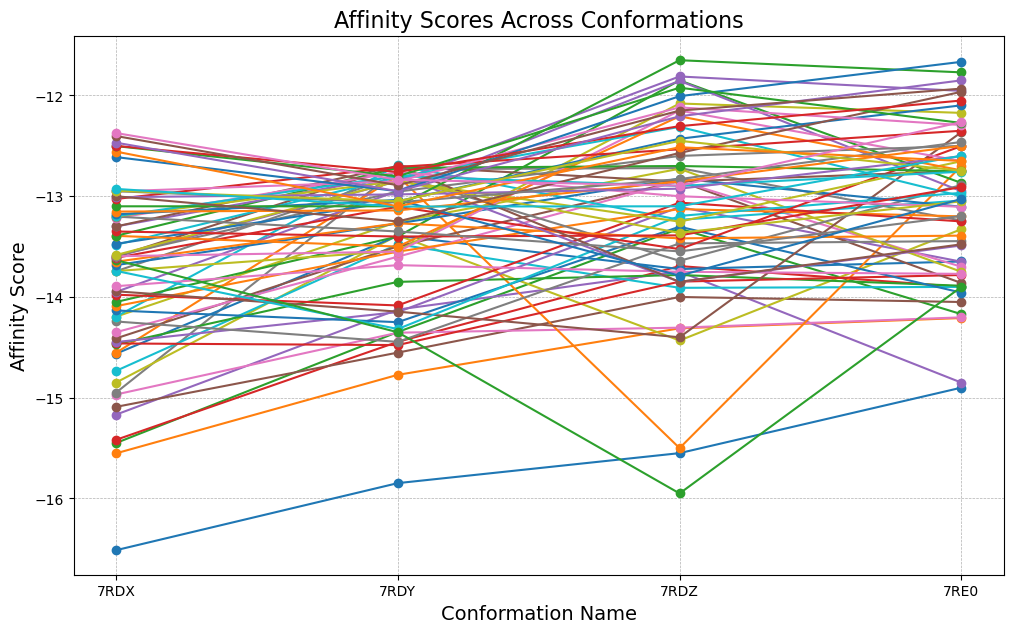

In [88]:
plot_affinity(df_dropna)

In [148]:
def plot_affinity_summary(df):
    # Extracting the unique identifiers for the conformations (e.g., '7RDX', '7RDY', '7RDZ', '7RE0')
    conformation_identifiers = [col.split(' - ')[0] for col in df.columns if 'mean' in col]
    
    # Create a list of mean columns
    mean_columns = [identifier + ' - mean' for identifier in conformation_identifiers]

    # Preparing the plot
    plt.figure(figsize=(12, 7))

    # Initialize lists to hold summary statistics for each conformation
    means, medians, p25s, p75s, mins, maxes = [], [], [], [], [], []

    # Calculating summary statistics for each conformation
    for col in mean_columns:
        means.append(df[col].mean())
        medians.append(df[col].median())
        p25s.append(df[col].quantile(0.25))
        p75s.append(df[col].quantile(0.75))
        mins.append(df[col].min())
        maxes.append(df[col].max())

    # Plotting summary statistics
    plt.plot(conformation_identifiers, means, marker='o', label='Mean', linewidth=2)
    plt.plot(conformation_identifiers, medians, marker='x', label='Median')
    plt.plot(conformation_identifiers, p25s, marker='1', label='25th percentile', linewidth=1, linestyle='-.')
    plt.plot(conformation_identifiers, p75s, marker='2', label='75th percentile', linewidth=1, linestyle='-.')
    plt.plot(conformation_identifiers, mins, marker='_', label='Min', linestyle=':')
    plt.plot(conformation_identifiers, maxes, marker='+', label='Max', linestyle=':')

    # Adding labels and title
    plt.xlabel('Protein structure', fontsize=14)
    plt.ylabel('Affinity Score (kcal/mol)', fontsize=14)
    #plt.title('Summary Statistics of Affinity Scores Across Conformations', fontsize=16)
    plt.legend()

    # Adding grid for better readability
    plt.grid(True, which="both", ls="--", linewidth=0.5)

    # Show the plot
    plt.show()

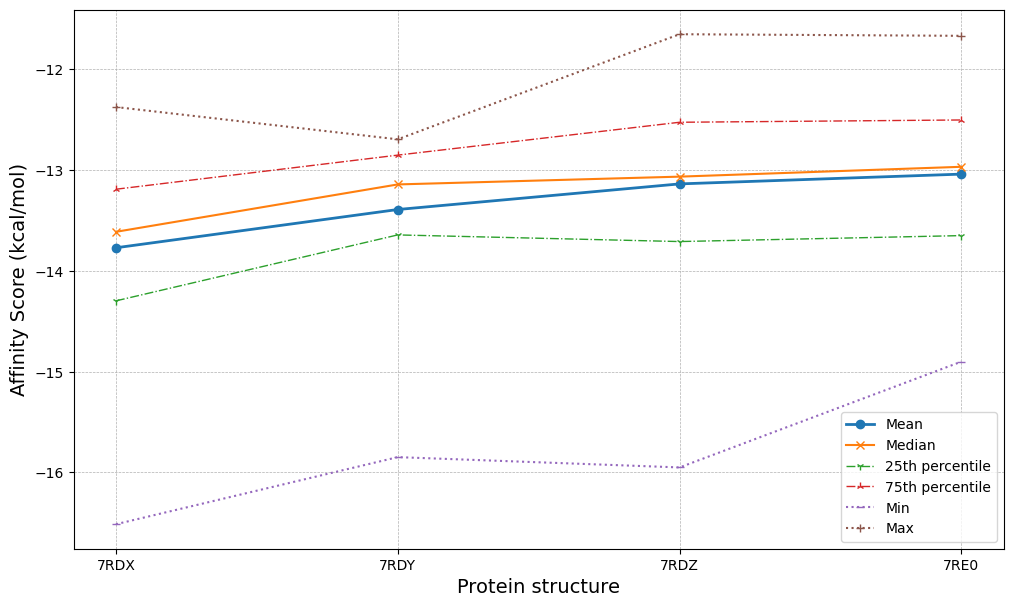

In [149]:
plot_affinity_summary(df_dropna)

In [183]:
def plot_affinity_boxplot(df):
    # Extracting the unique identifiers for the conformations (e.g., '7RDX', '7RDY', '7RDZ', '7RE0')
    conformation_identifiers = [col.split(' - ')[0] for col in df.columns if 'mean' in col]

    # Create a list of mean columns
    mean_columns = [identifier + ' - mean' for identifier in conformation_identifiers]

    # Extracting the data for each conformation into a list of lists
    data_to_plot = [df[col].dropna() for col in mean_columns]

    # Preparing the plot
    plt.figure(figsize=(12, 7))
    plt.style.use('seaborn-v0_8-darkgrid')  # Use seaborn style for a more professional look

    # Creating the box plot with customized aesthetics
    boxprops = dict(linestyle='-', linewidth=2, color='darkblue', facecolor='lightblue', alpha=0.7)
    whiskerprops = dict(linestyle='--', linewidth=2, color='darkblue')
    capprops = dict(linestyle='-', linewidth=2, color='darkblue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
    flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')

    plt.boxplot(data_to_plot, labels=conformation_identifiers, notch=True, sym='r+', vert=True, patch_artist=True, 
                boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, 
                flierprops=flierprops)

    # Adding labels and title with customized font styles
    plt.xlabel('Protein Structure', fontsize=14, fontweight='bold', family='sans-serif')
    plt.ylabel('Affinity Score (kcal/mol)', fontsize=14, fontweight='bold', family='sans-serif')

    # Customizing ticks for a cleaner look
    plt.xticks(fontsize=12, fontweight='bold', family='sans-serif')
    plt.yticks(fontsize=12, fontweight='bold', family='sans-serif')

    # Enhancing grid visibility while keeping it subtle
    plt.grid(True, which="both", ls="--", linewidth=0.5, color='gray', alpha=0.5)

    # Show the plot
    plt.show()

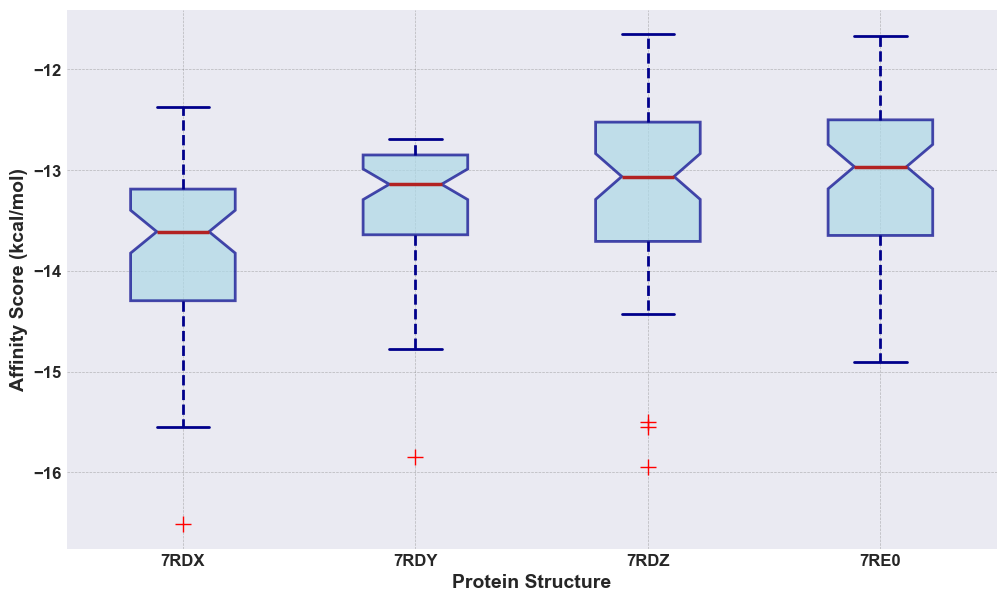

In [184]:
plot_affinity_boxplot(df_dropna)

In [163]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [89]:
def plot_rank(df, rank_columns, conformation_identifiers):
    plt.figure(figsize=(12, 7))

    # Plotting the lines for each molecule
    for index, row in df.iterrows():
        # Ensure affinity_scores are floats and handle NaN values
        rank_scores = row[rank_columns].astype(float).values
        # Check if all the scores are NaN
        if not np.all(np.isnan(rank_scores)):
            # Use only rows with no NaN values for plotting
            valid_scores = ~np.isnan(rank_scores)
            plt.plot(np.array(conformation_identifiers)[valid_scores], rank_scores[valid_scores], marker='o')

    # Adding labels and title
    plt.xlabel('Conformation Name', fontsize=14)
    plt.ylabel('Ranks Score', fontsize=14)
    plt.title('Rank Scores Across Conformations', fontsize=16)

    # Adding grid for better readability
    plt.grid(True, which="both", ls="--", linewidth=0.5)

    # Show the plot
    plt.show()

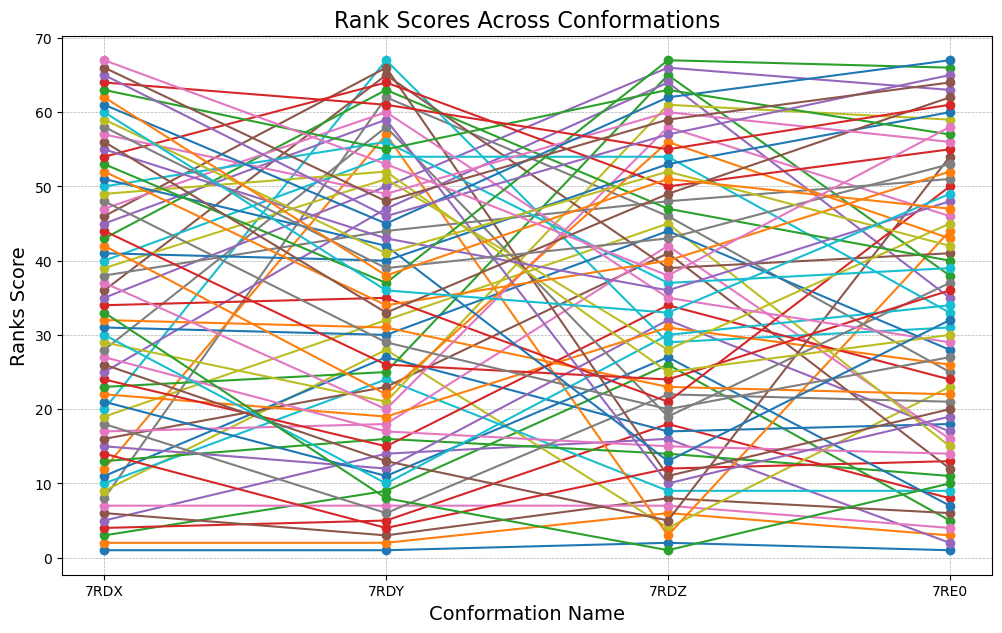

In [90]:
plot_rank(df_dropna, ['New7RDX_rank', 'New7RDY_rank', 'New7RDZ_rank', 'New7RE0_rank'], ['7RDX', '7RDY', '7RDZ', '7RE0'])

In [91]:
def count_plot(df):
    max_affinity_counts = df['Max Affinity ID'].value_counts()
    min_affinity_counts = df['Min Affinity ID'].value_counts()
    max_rank_counts = df['Max Rank ID'].value_counts()
    min_rank_counts = df['Min Rank ID'].value_counts()

    # Print out the counts for each
    print("Counts of unique conformations for Max Affinity ID:")
    print(max_affinity_counts)
    print("\nCounts of unique conformations for Min Affinity ID:")
    print(min_affinity_counts)
    print("\nCounts of unique conformations for Max Rank ID:")
    print(max_rank_counts)
    print("\nCounts of unique conformations for Min Rank ID:")
    print(min_rank_counts)

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Plot the counts for each of the specified columns
    max_affinity_counts.plot(kind='bar', ax=axes[0, 0], title='Max Affinity ID Counts', color='skyblue')
    min_affinity_counts.plot(kind='bar', ax=axes[0, 1], title='Min Affinity ID Counts', color='lightgreen')
    max_rank_counts.plot(kind='bar', ax=axes[1, 0], title='Max Rank ID Counts', color='salmon')
    min_rank_counts.plot(kind='bar', ax=axes[1, 1], title='Min Rank ID Counts', color='gold')

    # Adding labels and title for the figure
    axes[0, 0].set_ylabel('Counts')
    axes[0, 1].set_ylabel('Counts')
    axes[1, 0].set_ylabel('Counts')
    axes[1, 1].set_ylabel('Counts')
    plt.suptitle('Counts of Unique Conformations')

    # Adjust layout for better fit
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()

Counts of unique conformations for Max Affinity ID:
Max Affinity ID
7RDY    39
7RE0    34
7RDZ    27
7RDX     1
Name: count, dtype: int64

Counts of unique conformations for Min Affinity ID:
Min Affinity ID
7RDX    45
7RDY    45
7RDZ    10
7RE0     1
Name: count, dtype: int64

Counts of unique conformations for Max Rank ID:
Max Rank ID
7RDY    72
7RDZ    12
7RE0    10
7RDX     7
Name: count, dtype: int64

Counts of unique conformations for Min Rank ID:
Min Rank ID
7RDY    31
7RDZ    30
7RDX    22
7RE0    18
Name: count, dtype: int64


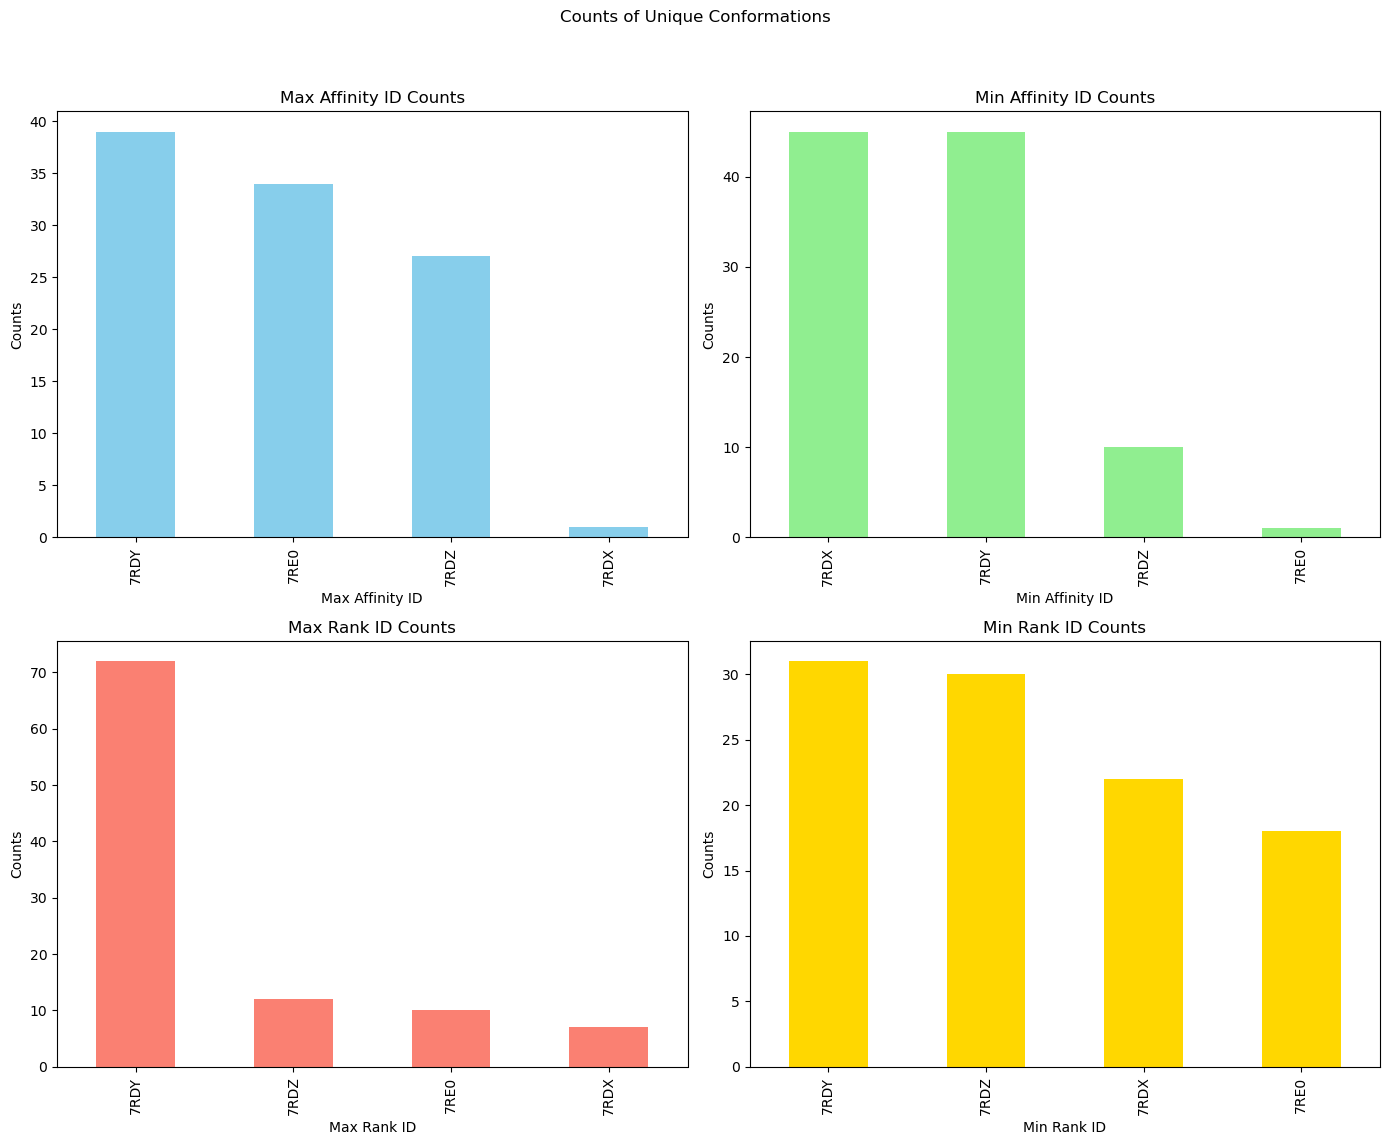

In [92]:
count_plot(df)

In [193]:
def count_plot(df):
    max_affinity_counts = df['Max Affinity ID'].value_counts()
    min_affinity_counts = df['Min Affinity ID'].value_counts()
    max_rank_counts = df['max_rank'].value_counts()
    min_rank_counts = df['min_rank'].value_counts()

    # Print out the counts for each
    print("Counts of unique conformations for Max Affinity ID:")
    print(max_affinity_counts)
    print("\nCounts of unique conformations for Min Affinity ID:")
    print(min_affinity_counts)
    print("\nCounts of unique conformations for Max Rank ID:")
    print(max_rank_counts)
    print("\nCounts of unique conformations for Min Rank ID:")
    print(min_rank_counts)

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Plot the counts for each of the specified columns
    max_affinity_counts.plot(kind='bar', ax=axes[0, 0], title='Max Affinity Counts', color='skyblue')
    min_affinity_counts.plot(kind='bar', ax=axes[0, 1], title='Min Affinity Counts', color='lightgreen')
    max_rank_counts.plot(kind='bar', ax=axes[1, 0], title='Max Rank Counts', color='salmon')
    min_rank_counts.plot(kind='bar', ax=axes[1, 1], title='Min Rank Counts', color='gold')

    # Adding labels and title for the figure
    axes[0, 0].set_ylabel('Counts')
    axes[0, 0].set_xlabel('')
    axes[0, 1].set_ylabel('Counts')
    axes[0, 1].set_xlabel('')
    axes[1, 0].set_ylabel('Counts')
    axes[1, 0].set_xlabel('')
    axes[1, 1].set_ylabel('Counts')
    axes[1, 1].set_xlabel('')

    # Adjust layout for better fit
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()

Counts of unique conformations for Max Affinity ID:
Max Affinity ID
7RE0    28
7RDZ    27
7RDY    11
7RDX     1
Name: count, dtype: int64

Counts of unique conformations for Min Affinity ID:
Min Affinity ID
7RDX    41
7RDY    17
7RDZ     9
Name: count, dtype: int64

Counts of unique conformations for Max Rank ID:
max_rank
7RDZ    23
7RDX    19
7RDY    18
7RE0     7
Name: count, dtype: int64

Counts of unique conformations for Min Rank ID:
min_rank
7RDY    22
7RDZ    20
7RE0    13
7RDX    12
Name: count, dtype: int64


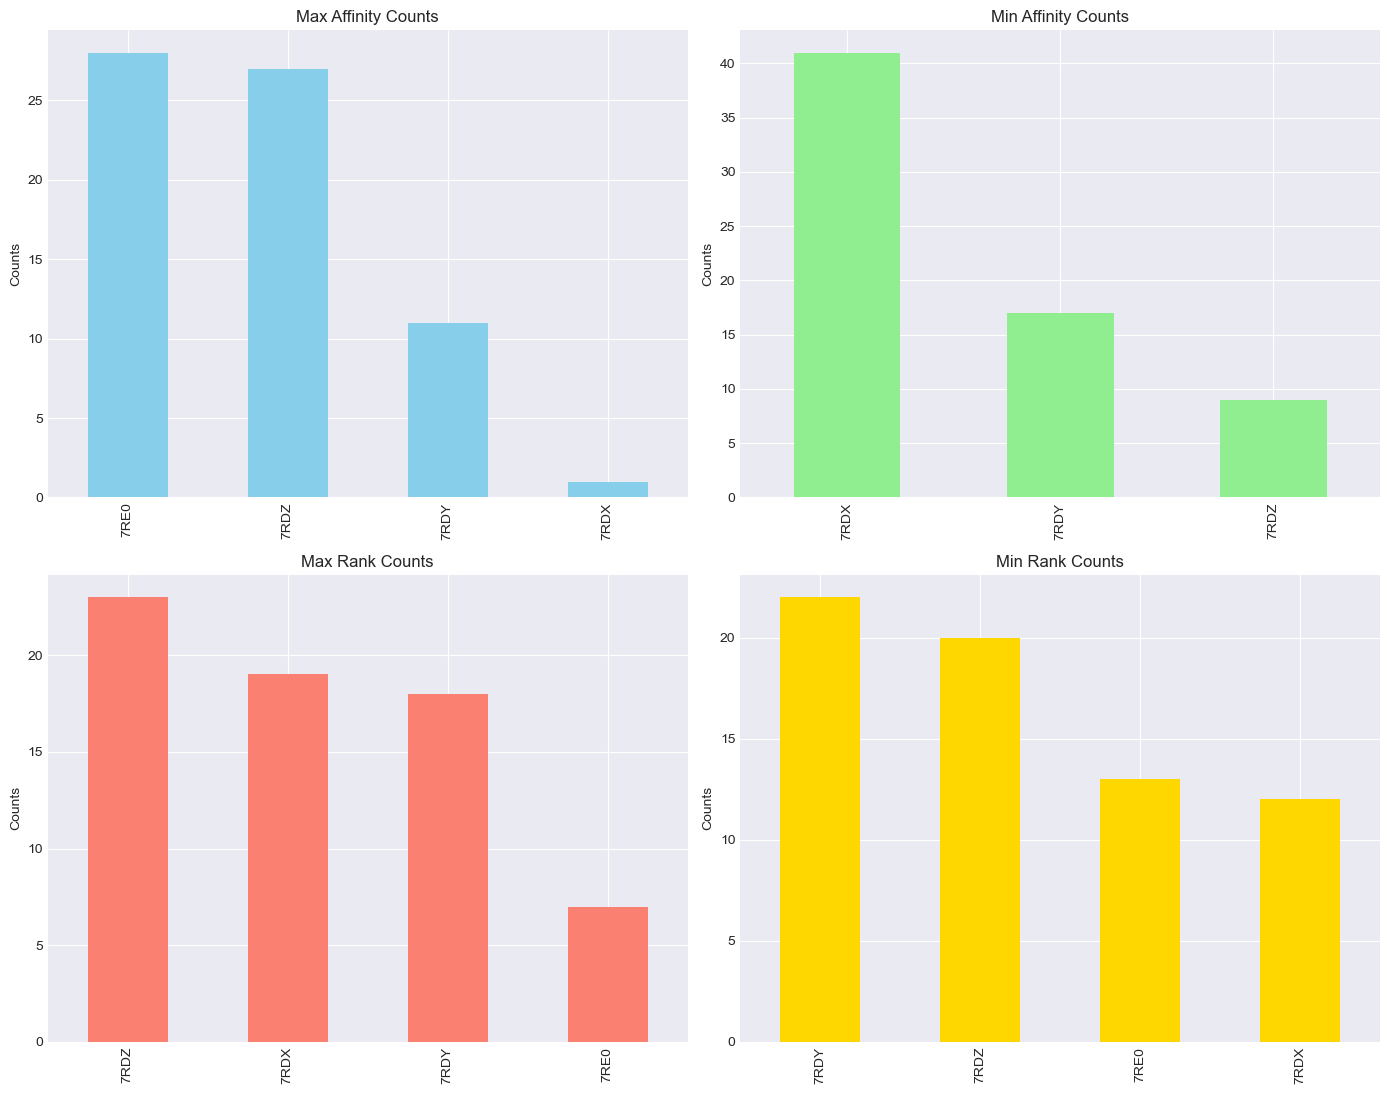

In [194]:
count_plot(df_dropna)

In [112]:
def affinity_variance_dist(df):
    # Select the 'Variance of Affinity Scores' column
    variance_of_affinity_scores = df['Variance of Affinity Scores']

    # Create the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(variance_of_affinity_scores, bins=40, color='blue', edgecolor='black', alpha=0.7)

    # Add a title and labels
    plt.title('Histogram of Variance of Affinity Scores')
    plt.xlabel('Variance of Affinity Scores')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

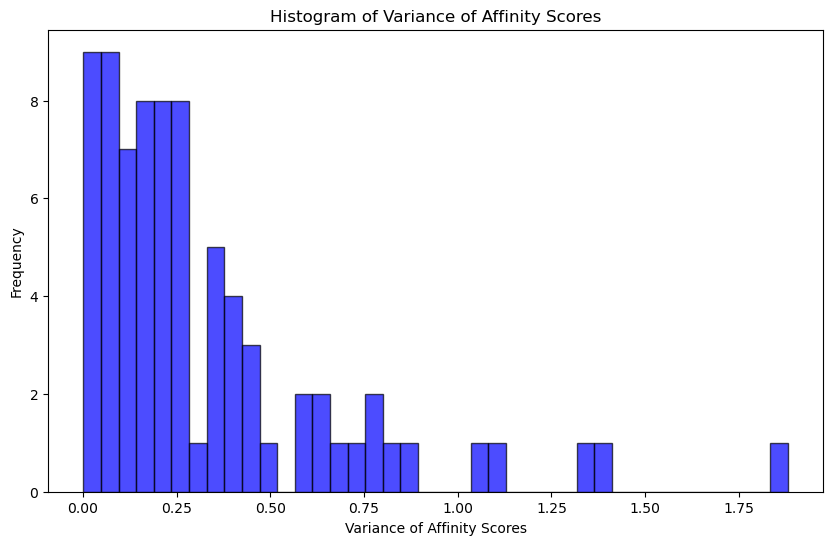

In [113]:
affinity_variance_dist(df)

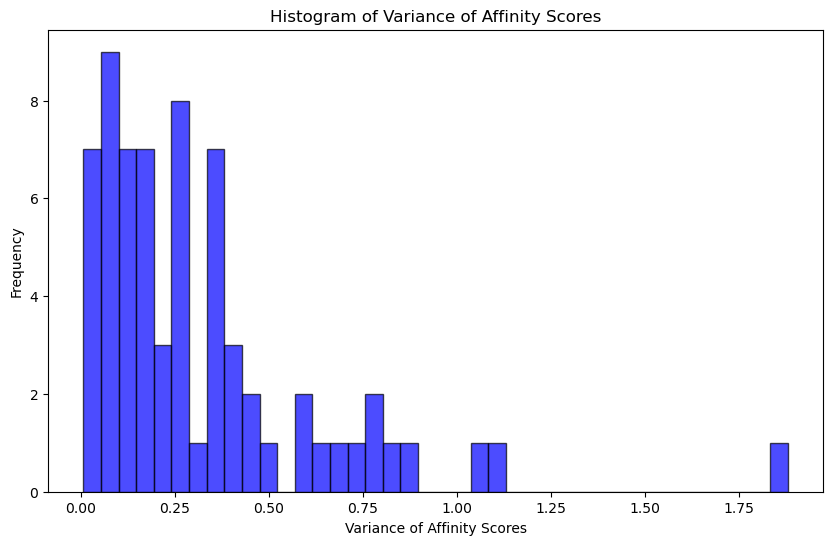

In [111]:
affinity_variance_dist(df_dropna)

In [195]:
def rank_variance_dist(df, col):
    # Select the 'Variance of Affinity Scores' column
    variance_of_affinity_scores = df[col]
    plt.style.use('seaborn-v0_8-darkgrid')
    
    # Create the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(variance_of_affinity_scores, bins=40, color='blue', edgecolor='black', alpha=0.7)

    # Add a title and labels
    #plt.title('Histogram of Variance of Rankings')
    plt.xlabel('Variance of  Rankings')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

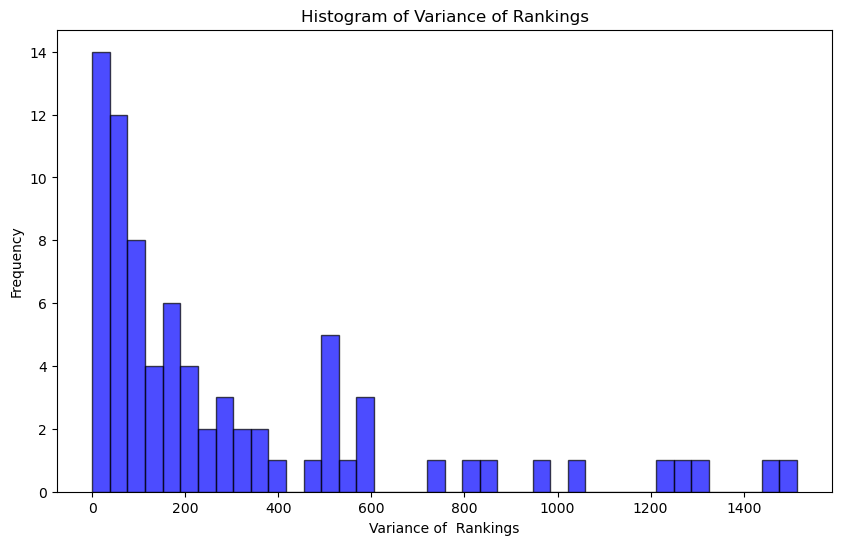

In [109]:
rank_variance_dist(df, 'Variance of Rankings')

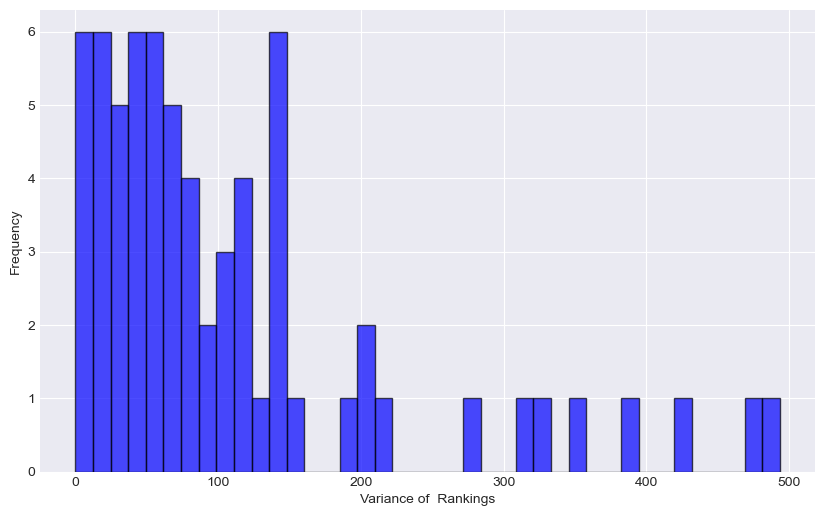

In [196]:
rank_variance_dist(df_dropna, 'new_rank_var')

In [197]:
df_dropna['new_rank_var'].describe()

count     67.000000
mean     112.294776
std      114.830718
min        0.187500
25%       37.187500
50%       72.187500
75%      139.937500
max      493.500000
Name: new_rank_var, dtype: float64

In [98]:
def column_correlation(df):
    
    # Select only numeric columns for the correlation matrix
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

    # Add a title
    plt.title('Correlation Matrix of Dataset')

    # Show the plot
    plt.show()

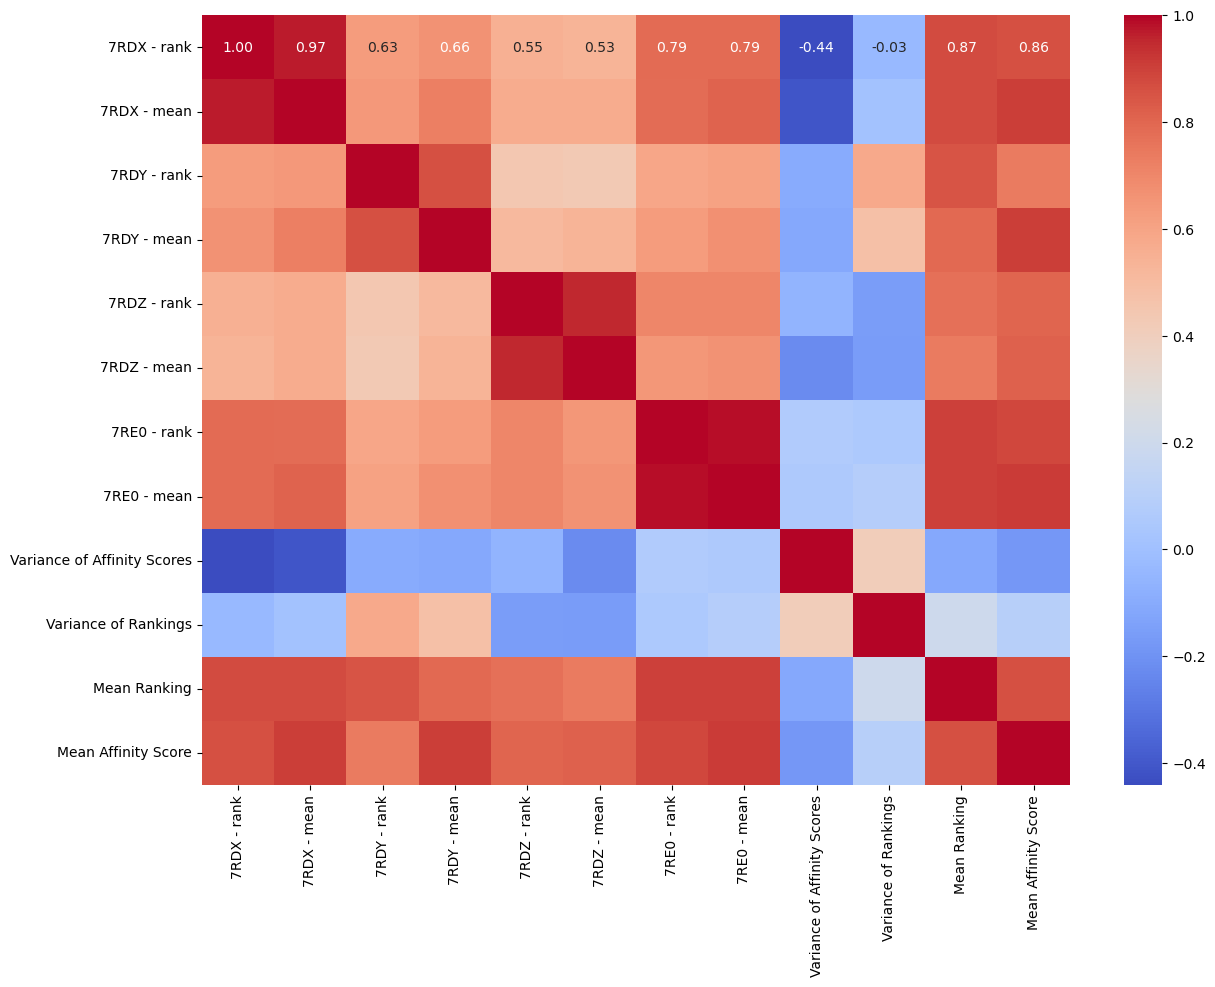

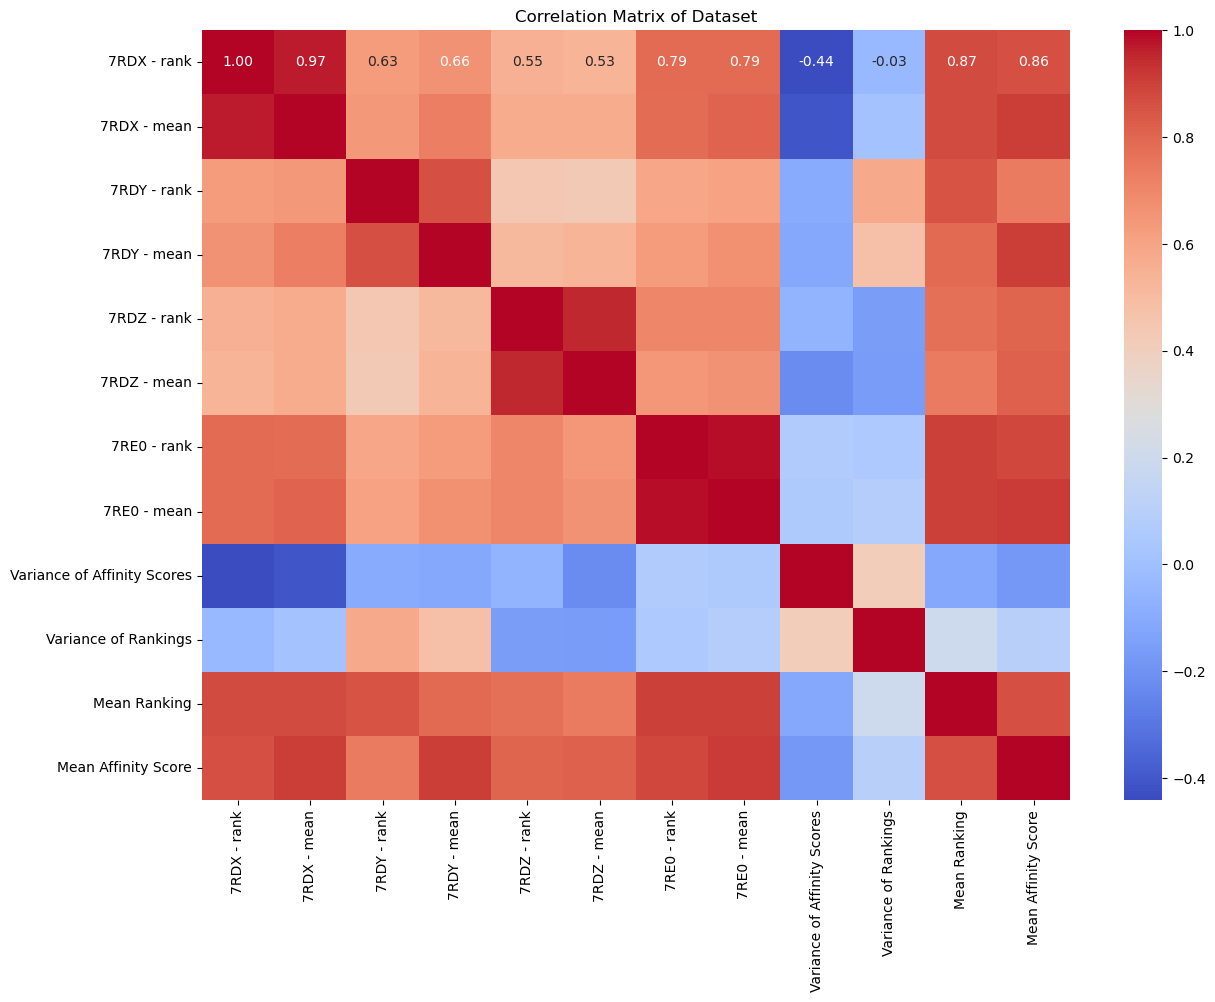

In [99]:
column_correlation(df)

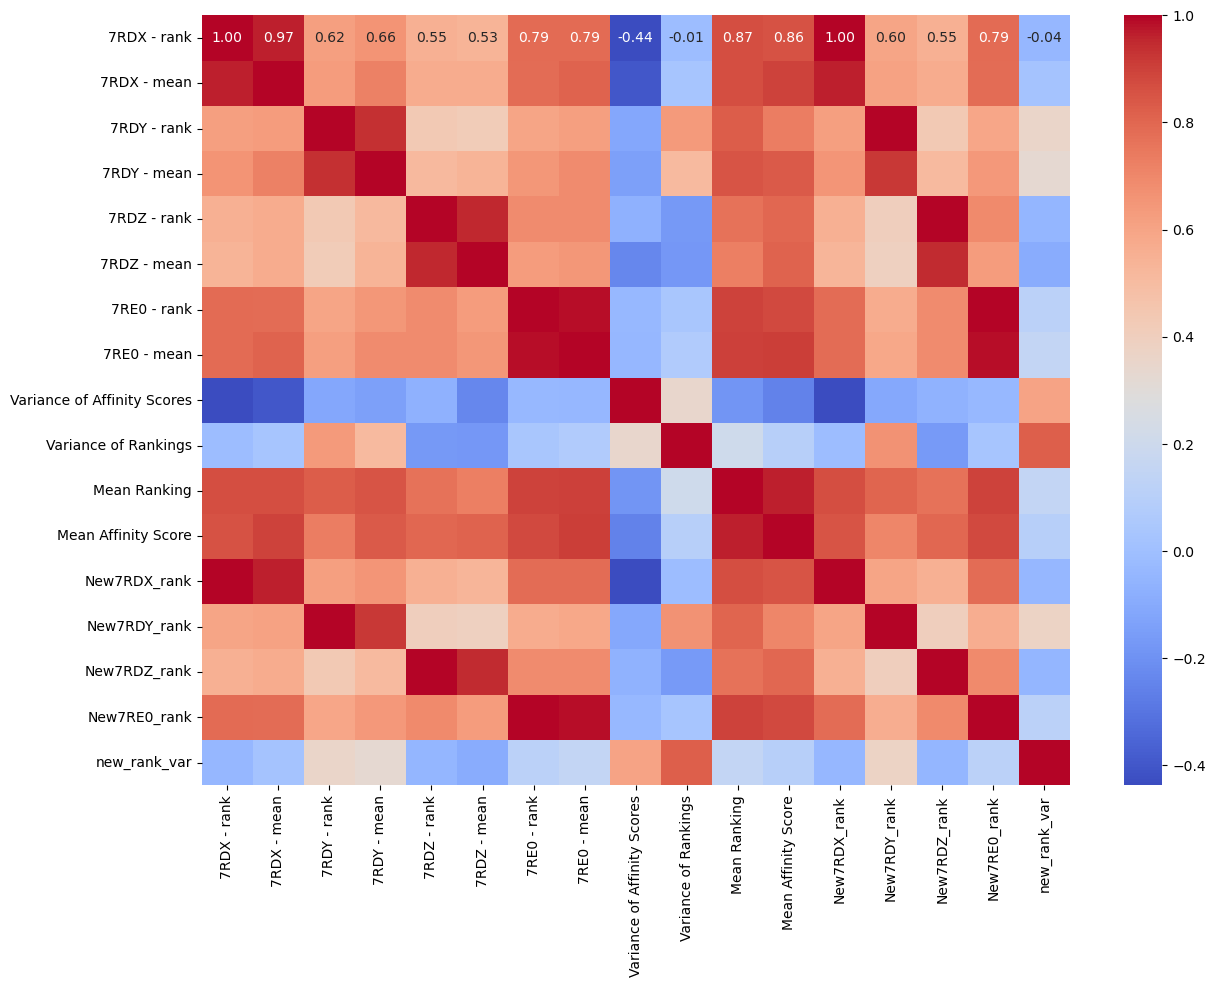

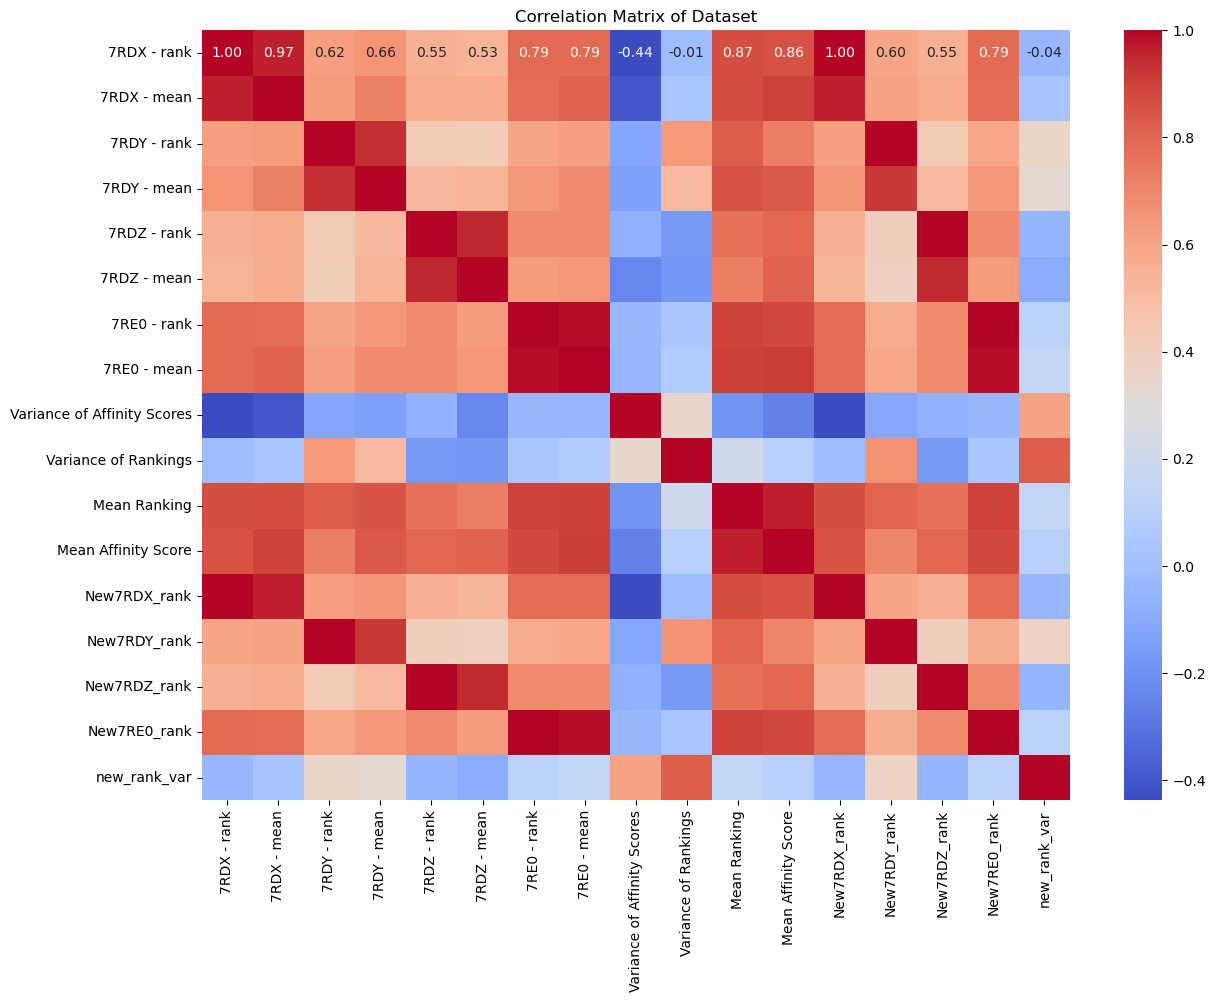

In [100]:
column_correlation(df_dropna)

In [79]:
df_dropna.sort_values(by='Mean Affinity Score', ascending=True)

,ligandID,7RDX - rank,7RDX - mean,7RDY - rank,7RDY - mean,7RDZ - rank,7RDZ - mean,7RE0 - rank,7RE0 - mean,Variance of Affinity Scores,Variance of Rankings,Mean Ranking,Mean Affinity Score,Max Affinity ID,Min Affinity ID,Max Rank ID,Min Rank ID
0,Mrv0541-02231214492D,0.0,-16.513636,1,-15.847727,1.0,-15.550000,0.0,-14.900000,0.448765,0.333333,0.50,-15.702841,7RE0,7RDX,7RDY,7RDX
1,Mrv0541-02231215202D,1.0,-15.552273,4,-14.772727,6.0,-14.311364,3.0,-14.209091,0.374390,4.333333,3.50,-14.711364,7RE0,7RDX,7RDZ,7RDX
5,Mrv1718005171816422D,5.0,-15.168182,20,-14.125000,16.0,-13.747727,1.0,-14.850000,0.424177,80.333333,10.50,-14.472727,7RDZ,7RDX,7RDY,7RE0
35,Mrv1909-05212117472D,35.0,-13.634091,14,-14.350000,0.0,-15.950000,10.0,-13.900000,1.075972,216.916667,14.75,-14.458523,7RDX,7RDZ,7RDX,7RDZ
7,Mrv1909-11302222542D,7.0,-14.968182,13,-14.354545,7.0,-14.304545,4.0,-14.202273,0.119977,14.250000,7.75,-14.457386,7RE0,7RDX,7RDY,7RE0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Mrv1909-12181921482D,67.0,-12.500000,92,-12.759091,55.0,-12.304545,68.0,-12.050000,0.090170,240.333333,70.50,-12.403409,7RE0,7RDY,7RDY,7RDZ
66,Mrv1572001261621122D,66.0,-12.502273,86,-12.802273,63.0,-11.922727,63.0,-12.272727,0.137924,123.000000,69.50,-12.375000,7RDZ,7RDY,7RDY,7RDZ
68,Mrv1652306231722482D,68.0,-12.468182,73,-12.950000,57.0,-12.206818,72.0,-11.850000,0.214354,53.666667,67.50,-12.368750,7RE0,7RDY,7RDY,7RDZ
69,Mrv1652310211602442D-1704021547279,69.0,-12.402273,76,-12.890909,59.0,-12.150000,71.0,-11.931818,0.170012,50.916667,68.75,-12.343750,7RE0,7RDY,7RDY,7RDZ


In [80]:
df_dropna.sort_values(by='Mean Ranking', ascending=True)

,ligandID,7RDX - rank,7RDX - mean,7RDY - rank,7RDY - mean,7RDZ - rank,7RDZ - mean,7RE0 - rank,7RE0 - mean,Variance of Affinity Scores,Variance of Rankings,Mean Ranking,Mean Affinity Score,Max Affinity ID,Min Affinity ID,Max Rank ID,Min Rank ID
0,Mrv0541-02231214492D,0.0,-16.513636,1,-15.847727,1.0,-15.550000,0.0,-14.900000,0.448765,0.333333,0.50,-15.702841,7RE0,7RDX,7RDY,7RDX
1,Mrv0541-02231215202D,1.0,-15.552273,4,-14.772727,6.0,-14.311364,3.0,-14.209091,0.374390,4.333333,3.50,-14.711364,7RE0,7RDX,7RDZ,7RDX
6,Mrv1909-11222222552D,6.0,-15.090909,6,-14.552273,8.0,-14.000000,7.0,-14.050000,0.260291,0.916667,6.75,-14.423295,7RDZ,7RDX,7RDZ,7RDX
7,Mrv1909-11302222542D,7.0,-14.968182,13,-14.354545,7.0,-14.304545,4.0,-14.202273,0.119977,14.250000,7.75,-14.457386,7RE0,7RDX,7RDY,7RE0
4,Glycyrrhetinic-acid-ChEBI,4.0,-15.418182,9,-14.445455,18.0,-13.693182,9.0,-13.900000,0.594409,34.000000,10.00,-14.364205,7RDZ,7RDX,7RDZ,7RDX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Mrv1652306231722482D,68.0,-12.468182,73,-12.950000,57.0,-12.206818,72.0,-11.850000,0.214354,53.666667,67.50,-12.368750,7RE0,7RDY,7RDY,7RDZ
64,Mrv1652310201623012D-1704021546192,64.0,-12.611364,71,-12.950000,62.0,-12.006818,75.0,-11.665909,0.335728,36.666667,68.00,-12.308523,7RE0,7RDY,7RE0,7RDZ
69,Mrv1652310211602442D-1704021547279,69.0,-12.402273,76,-12.890909,59.0,-12.150000,71.0,-11.931818,0.170012,50.916667,68.75,-12.343750,7RE0,7RDY,7RDY,7RDZ
66,Mrv1572001261621122D,66.0,-12.502273,86,-12.802273,63.0,-11.922727,63.0,-12.272727,0.137924,123.000000,69.50,-12.375000,7RDZ,7RDY,7RDY,7RDZ
